In [ ]:
pip install ultralytics opencv-python torch

In [ ]:
#! pip install inference_sdk
image_path = '/content/drive/MyDrive/Detection-of-violence/images/not gun/pngtree-sea-beach-natural-scenery-background-photography-image_16332956.jpg'



from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mmAlw6mbmqi39y5wLaQs"
)

result = CLIENT.infer(image_path, model_id="e_commerce_gun_detection/5")
result

# gun detction

{'x': 288.5, 'y': 266.0, 'width': 497.0, 'height': 154.0, 'confidence': 0.9063432812690735, 'class': 'weapon', 'class_id': 0, 'detection_id': '9e3a9f6d-bfdf-47bb-a0a8-8e4bff0953f3', 'check': True}
{'x': 319.0, 'y': 96.0, 'width': 570.0, 'height': 146.0, 'confidence': 0.9060641527175903, 'class': 'weapon', 'class_id': 0, 'detection_id': '91af0adb-36fa-454a-8e5c-0876c0dbbabc', 'check': True}


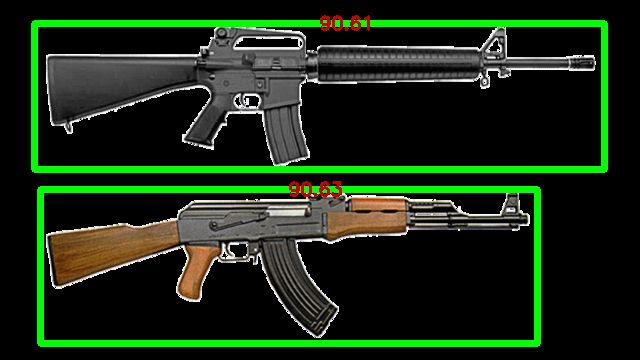

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# ! pip install inference_sdk
from inference_sdk import InferenceHTTPClient

image_path = '/content/drive/MyDrive/Detection-of-violence/images/gun/13.png'
image = cv2.imread(image_path)
check_gun = True


CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mmAlw6mbmqi39y5wLaQs"
)

result = CLIENT.infer(image_path, model_id="e_commerce_gun_detection/5")

if len(result["predictions"])==0:
  print('no gun found')
  check_gun = False
else:
  for gun in result["predictions"]:
    if gun["confidence"]<0.5:
      gun['check'] = False
    else:
      gun['check'] = True






if check_gun == True:
  for rec in result["predictions"]:
    if rec['check'] == True:
      print(rec)
      x,y = (int(rec["x"]) - int(rec["width"])//2 , int(rec["y"])-int(rec["height"])//2)
      width , hieght = (int(rec["width"])+x, int(rec["height"])+y)
      cv2.rectangle(image, (x,y), (width, hieght), (0, 255, 0), 6)
      cv2.putText(image, f'{(rec["confidence"]*100):.2f}', (int(rec['x']), y+6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 200), 2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# kinfe detection

{'x': 837.5, 'y': 344.0, 'width': 691.0, 'height': 272.0, 'confidence': 0.8638128042221069, 'class': 'knife', 'class_id': 0, 'detection_id': 'd50871dd-8b3b-4876-9679-d49fc75e59b8', 'check': True}
{'x': 828.0, 'y': 572.5, 'width': 764.0, 'height': 467.0, 'confidence': 0.7574359178543091, 'class': 'knife', 'class_id': 0, 'detection_id': 'c449df1e-016d-4b9a-a174-691427463b86', 'check': True}
{'x': 829.0, 'y': 138.5, 'width': 570.0, 'height': 173.0, 'confidence': 0.5078878402709961, 'class': 'knife', 'class_id': 0, 'detection_id': 'd934ba82-3cad-4ba9-8ee4-77acdadc196a', 'check': True}


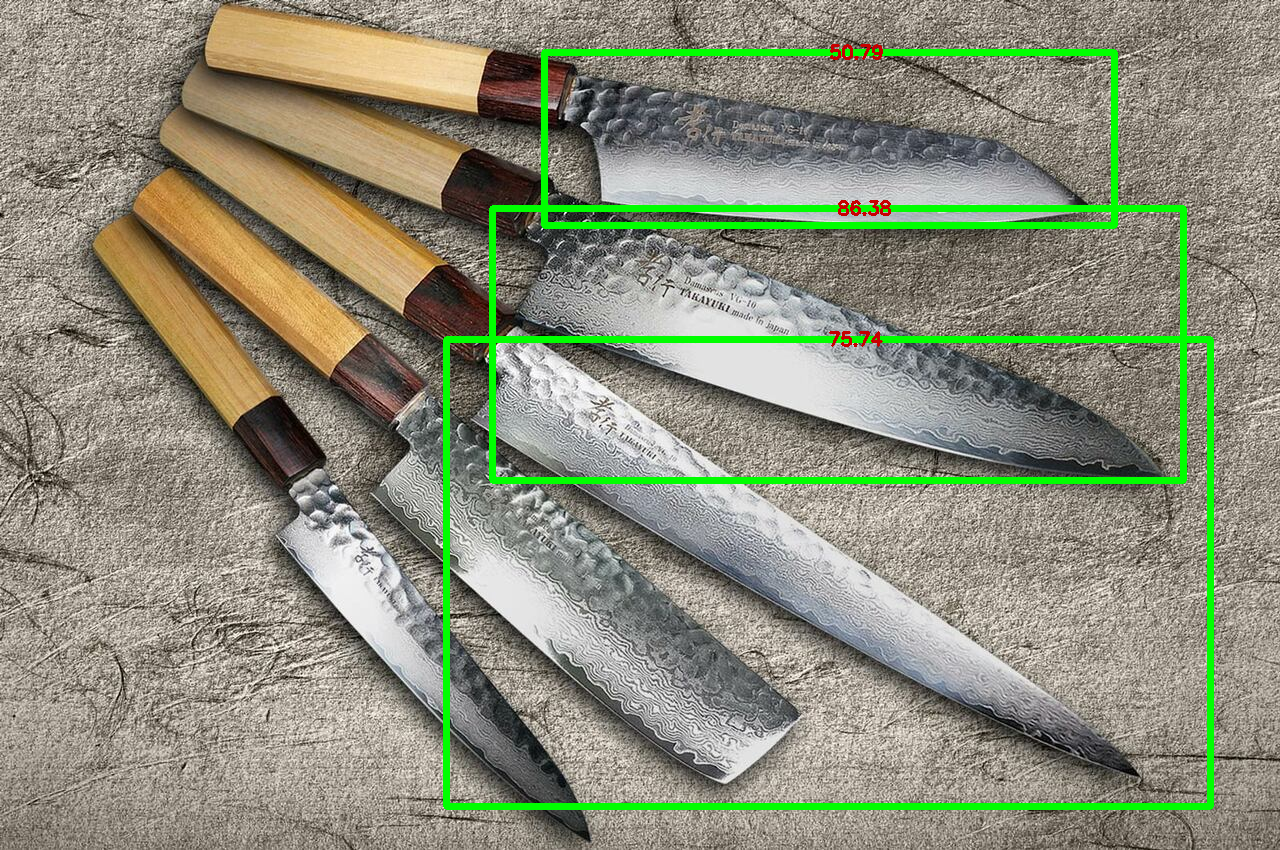

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# ! pip install inference_sdk
from inference_sdk import InferenceHTTPClient

image_path = '/content/drive/MyDrive/Detection-of-violence/images/knife/14.jpg'
image = cv2.imread(image_path)
check_gun = True



from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mmAlw6mbmqi39y5wLaQs"
)

result = CLIENT.infer(image_path, model_id="knife-epqzp-0rybq/1")


if len(result["predictions"])==0:
  print('no gun found')
  check_gun = False
else:
  for gun in result["predictions"]:
    if gun["confidence"]<0.5:
      gun['check'] = False
    else:
      gun['check'] = True






if check_gun == True:
  for rec in result["predictions"]:
    if rec['check'] == True:
      print(rec)
      x,y = (int(rec["x"]) - int(rec["width"])//2 , int(rec["y"])-int(rec["height"])//2)
      width , hieght = (int(rec["width"])+x, int(rec["height"])+y)
      cv2.rectangle(image, (x,y), (width, hieght), (0, 255, 0), 6)
      cv2.putText(image, f'{(rec["confidence"]*100):.2f}', (int(rec['x']), y+6), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 200), 2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

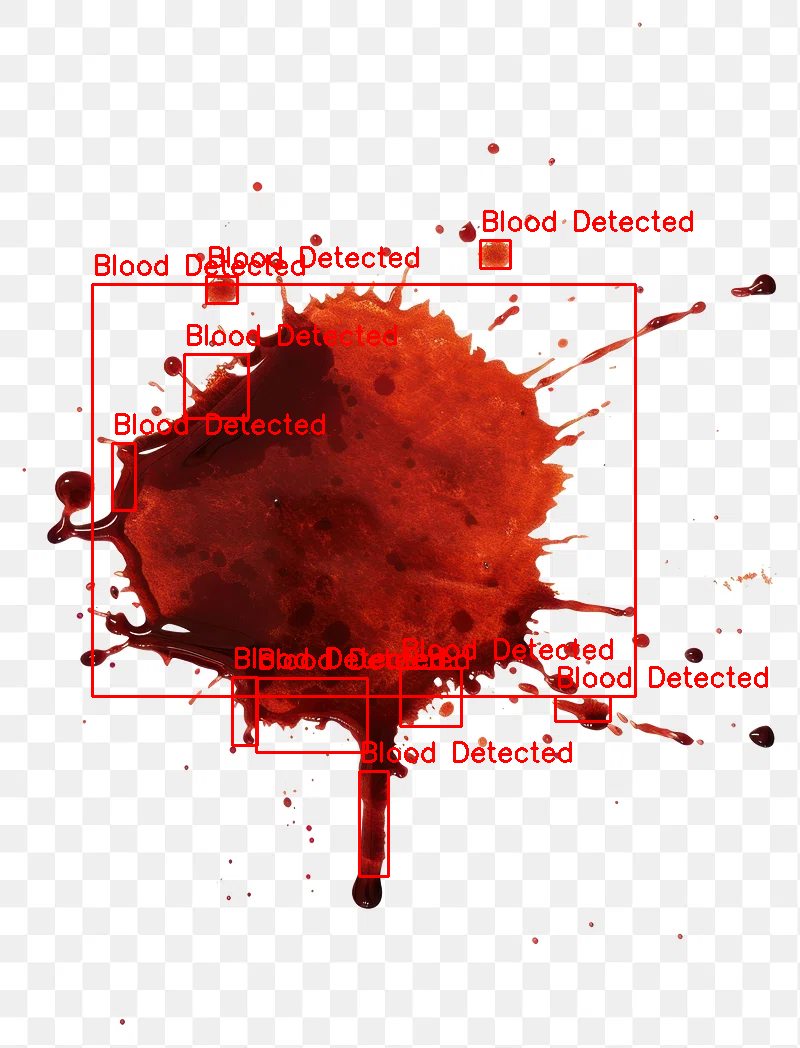

True


In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_blood(frame):
    # Convert the frame to HSV color space
    frame= cv2.imread(frame)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    check = False
    # Define the lower and upper bounds for the color red (blood-like color)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    # Create masks to detect red regions in the frame
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    blood_mask = cv2.bitwise_or(mask1, mask2)

    # Apply some morphological operations to reduce noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    blood_mask = cv2.morphologyEx(blood_mask, cv2.MORPH_OPEN, kernel)
    blood_mask = cv2.morphologyEx(blood_mask, cv2.MORPH_CLOSE, kernel)

    # Find contours of the detected blood regions
    contours, _ = cv2.findContours(blood_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 500:  # Filter out small areas
            check = True
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(frame, "Blood Detected", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    return frame , check
image , check = detect_blood('/content/drive/MyDrive/Detection-of-violence/images/blood/2.webp')
cv2_imshow(image)
print(check)

cv2.waitKey(0)
cv2.destroyAllWindows()

# if __name__ == "__main__":
#     main()